In [144]:
# Set up the workspace
using SumOfSquares, JuMP, PolyJuMP, DynamicPolynomials, MultivariatePolynomials, RecursiveArrayTools
using Mosek#, CSDP#, SCS
using Plots
gr()

include("../src/NormalSoS.jl")
using NormalSoS

# Nonlinear systems

For linear systems the dynamics can be written in terms of a matrix multiplication as
\begin{equation}
    \dot{x} = f(x) = Ax.
\end{equation}
In these cases the matrix $A$ is square, and its eigenvalues determine the properties of the linear system. This matrtix may be somewhat sparse, indicating that many of the states do not directly depend upon each other. However, unless $A$ is normal, the potential matrix $A_g$ will generally not be sparse. For nonlinear systems we can again write the dynamics in terms of a matrix multiplication as,
\begin{equation}
    \dot{x} = f(x) = Fm_p(x),
\end{equation}
where $m_p(x)$ is all the monomials in $x$ up to order $p$. The matrix $F$ will generally not be square, and its properties cannot be directly related to the stability properties of the system, without reference to the items in the monomial vector. The decomposition of $f(x)$ can be written as,
\begin{equation}
    f(x) = F_gm_p(x) + F_cm_p(x),
\end{equation}
where,
\begin{equation}
    F_gm_p(x) = -\nabla V(x) = -\nabla (m_q(x)^\top Q m_q(x)).
\end{equation}
The monomials $m_q$ will be of order $q=\frac{p+1}{2}$, while the matrix $Q$ is positive definite.

We are particularly interested to understand the minimal set of monomials required to form $V$. Given the decomposition of $F$ into $F_g$ and $F_c$, it is clear that the monomials required by $V$ are simply those in $m_p$ that correspond to non-zero entries of $F_g$, raised by a single relevent power in $x$.

The key question is therefore, given a sparse $F$, is $F_g$ generally sparse in the same way?

In [166]:
# Function to generate a random nonlinear polynomial system of size n and order p. Returns the matrix F.
function randnlsys(n,p, sparsity=0.3)
    
    l = length(monomials(x,0:p));
    F = zeros(n,l);
    
    # Choose some random indices in F and make the terms non-zero
    tmp = rand(1:n*l, round(Int,sparsity*n*l),1);
    for idx in tmp
        if idx > l
            F[2,idx-l] = -1.0;
        else
            F[1,idx] = -1.0;
        end
    end
    
    return F
    
end

randnlsys (generic function with 2 methods)

In [122]:
# Generate the random system
n = 2;    p = 3;
@polyvar x[1:n]
m = monomials(x,0:p);
F = randnlsys(n,p);
f = F*m;

20Chosen basis as:
DynamicPolynomials.Monomial{true}[x1^4, x1^3x2, x1^2x2^2, x1x2^3, x2^4, x1^3, x1^2x2, x1x2^2, x2^3, x1^2, x1x2, x2^2, x1, x2, 1]
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 594             
  Cones                  : 0               
  Scalar variables       : 18              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense       

status = :Stall
bnd = 

x1^4 + x1^2x2^2 + x2^4
getvalue(ϵ) = [0.223964, 0.00442859, 0.000704509]
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(600) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(601) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(602) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(603) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(604) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(605) of matrix 'A'.
MOSEK warning 705: #2 (nearly) zero elements are specified in sparse row ''(606) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(607) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(608) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in s

0.24324008837155683x1^4 - 0.10397755773666507x1^3x2 + 0.02109185735369317x1^2x2^2 + 0.3943541696068327x1x2^3 + 0.25578149763639274x2^4 + 0.16161866701624727x1^2 - 0.00018192935455598765x1x2 - 0.0012066533130337949x2^2 + 0.937594879895701

In [145]:
# Apply the SOS method to make a landscape
U = NormalSoS.normdecomp(f,x, MosekSolver(),5, :monomial,p+1, false)

Chosen basis as:
DynamicPolynomials.Monomial{true}[x1^4, x1^3x2, x1^2x2^2, x1x2^3, x2^4, x1^3, x1^2x2, x1x2^2, x2^3, x1^2, x1x2, x2^2, x1, x2, 1]
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 594             
  Cones                  : 0               
  Scalar variables       : 18              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        :

getvalue(ϵ) = [0.223964, 0.00442859, 0.000704509]
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(600) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(601) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(602) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(603) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(604) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(605) of matrix 'A'.
MOSEK warning 705: #2 (nearly) zero elements are specified in sparse row ''(606) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(607) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(608) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(609) of ma

8   4.3e-07  4.1e-07  2.0e-03  1.09e+00   9.999988184e-01   9.999984309e-01   4.1e-07  0.29  
9   6.4e-08  6.0e-08  6.7e-04  9.39e-01   9.999998470e-01   9.999997923e-01   6.0e-08  0.32  
10  1.5e-08  1.2e-08  2.5e-04  8.79e-01   9.999999770e-01   9.999999666e-01   1.2e-08  0.35  
Optimizer terminated. Time: 0.35    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.9999997697e-01    nrm: 2e+00    Viol.  con: 4e-08    var: 0e+00    barvar: 0e+00  
  Dual.    obj: 9.9999996663e-01    nrm: 5e+00    Viol.  con: 0e+00    var: 6e-09    barvar: 1e-08  
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(600) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(601) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(602) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(603) of 

4   9.2e-04  8.8e-04  9.0e-02  1.20e+00   9.972829397e-01   9.963304741e-01   8.8e-04  0.15  
5   1.9e-04  1.8e-04  3.8e-02  1.08e+00   9.995371859e-01   9.993597773e-01   1.8e-04  0.18  
6   1.8e-05  1.7e-05  1.2e-02  1.02e+00   9.999546655e-01   9.999375373e-01   1.7e-05  0.21  
7   3.1e-06  3.0e-06  5.0e-03  1.01e+00   9.999919628e-01   9.999889904e-01   3.0e-06  0.24  
8   4.8e-07  4.5e-07  2.1e-03  1.10e+00   9.999986377e-01   9.999982024e-01   4.5e-07  0.27  
9   7.0e-08  6.6e-08  7.3e-04  9.73e-01   9.999998195e-01   9.999997579e-01   6.6e-08  0.30  
10  1.6e-08  1.3e-08  2.6e-04  8.65e-01   9.999999739e-01   9.999999625e-01   1.3e-08  0.33  
Optimizer terminated. Time: 0.33    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.9999997388e-01    nrm: 2e+00    Viol.  con: 2e-08    var: 0e+00    barvar: 0e+00  
  Dual.    obj: 9.9999996247e-01    nrm: 5e+00    Viol.  con: 0e+00    var: 7e-09    barvar: 1e-0

0.24370055985799782x1^4 - 0.1043816904053651x1^3x2 + 0.021118461787117473x1^2x2^2 + 0.39549043148367713x1x2^3 + 0.2564692341458456x2^4 + 9.952896537456886e-13x1^3 - 1.2647669744895649e-12x1^2x2 - 2.318404183812352e-12x1x2^2 - 1.3269224963006745e-11x2^3 + 0.1612114093736628x1^2 - 0.0002238149875839593x1x2 - 0.0012062871077493417x2^2 + 7.813323961103046e-13x1 + 6.11374526242049e-12x2 + 0.918948529783405

f = DynamicPolynomials.Polynomial{true,Float64}[-x1^3 - x1x2^2 - x2^3 - x1, -x1x2^2 - x2^3]
0.24370055985799782x1^4 - 0.1043816904053651x1^3x2 + 0.021118461787117473x1^2x2^2 + 0.39549043148367713x1x2^3 + 0.2564692341458456x2^4 + 9.952896537456886e-13x1^3 - 1.2647669744895649e-12x1^2x2 - 2.318404183812352e-12x1x2^2 - 1.3269224963006745e-11x2^3 + 0.1612114093736628x1^2 - 0.0002238149875839593x1x2 - 0.0012062871077493417x2^2 + 7.813323961103046e-13x1 + 6.11374526242049e-12x2 + 0.918948529783405
0.14832154438494025


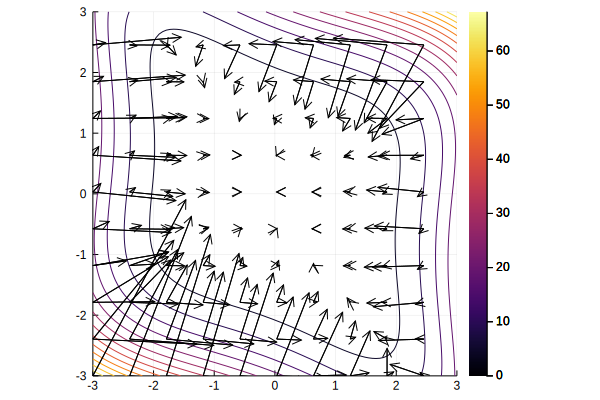

In [146]:
@show(f)
println(U)
println(NormalSoS.checknorm(f,U,x))
NormalSoS.plotlandscape(f,U,x,([-3 3],[-3 3]), true)

In [159]:
Fg = convert(Array,VectorOfArray(coefficients.(-differentiate(U,x))))';
Fc = F-Fg;

In [162]:
# Perform the process many times and check for patterns in the sparsity of the resulting matrix Fg
n = 2;    p = 3;
@polyvar x[1:n]
m = monomials(x,0:p);

FArry = Array{typeof(F)}(10,1);
FgArry = Array{typeof(F)}(10,1);

for ii=1:10
    F = randnlsys(n,p);    FArry[ii] = F;
    f = F*m;
    U = NormalSoS.normdecomp(f,x, MosekSolver(),2, :monomial,p+1, false);
    FgArry[ii] = convert(Array,VectorOfArray(coefficients.(-differentiate(U,x))))';
end

20Chosen basis as:
DynamicPolynomials.Monomial{true}[x1^4, x1^3x2, x1^2x2^2, x1x2^3, x2^4, x1^3, x1^2x2, x1x2^2, x2^3, x1^2, x1x2, x2^2, x1, x2, 1]
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 503             
  Cones                  : 0               
  Scalar variables       : 18              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense       

MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(506) of matrix 'A'.
MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(507) of matrix 'A'.
MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(513) of matrix 'A'.
MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(518) of matrix 'A'.
MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(522) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 529             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries             

3   3.8e-03  3.8e-03  7.0e-02  9.87e-01   -9.724894628e-03  -1.002897301e-02  3.8e-03  0.08  
4   5.9e-04  5.9e-04  2.1e-02  6.25e-01   -2.753926306e-03  -2.593329376e-03  5.9e-04  0.10  
5   1.1e-04  1.1e-04  8.2e-03  7.27e-01   -7.476154635e-04  -7.109610236e-04  1.1e-04  0.12  
6   1.9e-05  1.9e-05  2.9e-03  7.10e-01   -2.098227945e-04  -1.937872622e-04  1.9e-05  0.15  
7   4.2e-06  4.2e-06  1.2e-03  7.02e-01   -6.239686017e-05  -5.774207922e-05  4.2e-06  0.17  
8   6.7e-07  6.7e-07  3.8e-04  6.55e-01   -1.632403218e-05  -1.474256391e-05  6.7e-07  0.19  
9   1.4e-07  1.4e-07  1.8e-04  6.45e-01   -4.456476534e-06  -4.187989379e-06  1.4e-07  0.21  
10  3.2e-08  3.2e-08  8.6e-05  8.59e-01   -1.293488018e-06  -1.236041393e-06  3.2e-08  0.23  
11  5.2e-09  4.8e-09  2.5e-05  7.48e-01   -2.270303924e-07  -2.046060626e-07  4.8e-09  0.25  
Optimizer terminated. Time: 0.25    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 529             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 522
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 15                conic                  : 13              
Optimizer  - Semi-definite variables: 3                 scalarized             : 1497            
Factor     - setup time             : 0.02              dense det. time        : 0.00            
Factor     - ML order time          : 0.01              GP order time          : 0.00            
Factor     - nonzeros before factor :

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 548             
  Cones                  : 0               
  Scalar variables       : 18              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 548             
  Cones               

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 575             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 572
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 17                conic                  : 15              
Optimizer  - Semi-definite variables: 3                 scalarized             : 1787            
Factor     - setup time             : 0.02              dense det. time        : 0.00            
Factor     - ML order time          : 0.01              GP order time          : 0.00            
Factor     - nonzeros before factor :

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 501             
  Cones                  : 0               
  Scalar variables       : 18              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 501             
  Cones               

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 547             
  Cones                  : 0               
  Scalar variables       : 18              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 544
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 19                conic                  : 16              
Optimizer  - Semi-definite variables: 2                 scalarized             : 1732            
Factor     - setup time             : 0.02              dense det. time        : 0.00            
Factor     - ML order time          : 0.01              GP order time          : 0.00            
Factor     - nonzeros before factor :

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 574             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 572
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 18                conic                  : 16              
Optimizer  - Semi-definite variables: 3                 scalarized             : 1787            
Factor     - setup time             : 0.02              dense det. time        : 0.00            
Factor     - ML order time          : 0.01              GP order time          : 0.00            
Factor     - nonzeros before factor :

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 547             
  Cones                  : 0               
  Scalar variables       : 18              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 547             
  Cones               

Optimisation failed, exiting.
20Chosen basis as:
DynamicPolynomials.Monomial{true}[x1^4, x1^3x2, x1^2x2^2, x1x2^3, x2^4, x1^3, x1^2x2, x1x2^2, x2^3, x1^2, x1x2, x2^2, x1, x2, 1]
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 548             
  Cones                  : 0               
  Scalar variables       : 18              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :            

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 575             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 572
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 17                conic                  : 15              
Optimizer  - Semi-definite variables: 3                 scalarized             : 1787            
Factor     - setup time             : 0.02              dense det. time        : 0.00            
Factor     - ML order time          : 0.01              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.43e+0

MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(547) of matrix 'A'.
MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(549) of matrix 'A'.
MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(554) of matrix 'A'.
MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(572) of matrix 'A'.
MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(573) of matrix 'A'.
MOSEK warning 705: #1 (nearly) zero elements are specified in sparse row ''(574) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 575             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear d

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 504             
  Cones                  : 0               
  Scalar variables       : 18              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 504             
  Cones               

3   2.4e-03  7.9e+01  1.3e-04  -9.95e-01  -1.601404943e+06  -7.848413929e+04  2.4e-03  0.08  
4   4.5e-04  1.5e+01  1.1e-05  -9.64e-01  -7.618576856e+06  -3.836493187e+05  4.5e-04  0.10  
5   8.7e-05  2.9e+00  1.3e-06  -7.51e-01  -1.843565384e+07  -1.180018278e+06  8.7e-05  0.12  
6   1.6e-05  5.3e-01  6.0e-07  3.17e-01   -4.444945795e+06  -1.412978297e+06  1.6e-05  0.15  
7   3.4e-06  1.1e-01  4.2e-07  1.13e+00   -1.227021838e+06  -9.603738644e+05  3.4e-06  0.17  
8   5.7e-07  1.9e-02  1.8e-07  1.84e+00   -1.629916322e+05  -1.224161976e+05  5.7e-07  0.19  
9   1.1e-07  3.4e-03  9.2e-08  1.29e+00   -2.542932293e+04  -2.013709256e+04  1.1e-07  0.21  
10  2.6e-08  8.5e-04  4.6e-08  9.99e-01   -5.919955084e+03  -4.618301318e+03  2.6e-08  0.23  
11  4.6e-09  1.2e-04  1.9e-08  1.04e+00   -9.608951703e+02  -8.144407694e+02  3.6e-09  0.25  
12  4.5e-09  1.1e-04  1.8e-08  8.90e-01   -8.603862945e+02  -7.242366846e+02  3.2e-09  0.27  
13  3.8e-09  5.2e-05  1.2e-08  9.63e-01   -4.189060824e+02  

1   2.0e-01  2.0e-01  5.5e-01  4.90e-03   -2.785288012e-01  -3.873040792e-01  2.0e-01  0.06  
2   2.6e-02  2.6e-02  4.2e-01  1.37e+00   -8.688963962e-02  -1.046231562e-01  2.6e-02  0.09  
3   3.9e-03  3.9e-03  1.5e-01  1.29e+00   -1.612399619e-02  -1.831141766e-02  3.9e-03  0.12  
4   6.9e-04  6.9e-04  5.5e-02  1.06e+00   -2.621694649e-03  -2.949758161e-03  6.9e-04  0.16  
5   1.2e-04  1.2e-04  2.2e-02  1.01e+00   -4.512717942e-04  -5.046238233e-04  1.2e-04  0.19  
6   2.2e-05  2.2e-05  8.7e-03  9.98e-01   -7.685637891e-05  -8.559320996e-05  2.2e-05  0.22  
7   3.8e-06  3.8e-06  3.6e-03  1.00e+00   -1.229564985e-05  -1.373811544e-05  3.8e-06  0.25  
8   6.2e-07  6.2e-07  1.3e-03  1.00e+00   -1.892105080e-06  -2.095229937e-06  6.2e-07  0.28  
9   8.8e-08  8.8e-08  4.8e-04  9.95e-01   -2.459403731e-07  -2.714466385e-07  8.8e-08  0.31  
10  3.1e-08  3.1e-08  3.7e-04  7.44e-01   -4.055342744e-08  -5.351863732e-08  3.0e-08  0.35  
Optimizer terminated. Time: 0.35    


Interior-point soluti

2   2.2e-02  8.6e-02  3.5e-01  1.62e+00   -6.645940149e-01  -8.354804397e-01  2.2e-02  0.09  
3   3.5e-03  1.4e-02  1.5e-01  1.17e+00   -7.594525769e-02  -1.023002268e-01  3.5e-03  0.12  
4   7.7e-04  3.1e-03  4.1e-02  4.32e-01   1.878803528e-01   1.824800317e-01   7.7e-04  0.15  
5   1.7e-04  6.8e-04  9.0e-03  2.93e-01   3.773718813e-01   3.784163703e-01   1.7e-04  0.19  
6   3.3e-05  1.3e-04  1.8e-03  6.36e-02   5.581962742e-01   5.619055085e-01   3.3e-05  0.22  
7   8.6e-06  3.4e-05  4.4e-04  -5.96e-03  6.874560267e-01   6.925632239e-01   8.6e-06  0.25  
8   2.1e-06  8.4e-06  1.1e-04  1.72e-01   8.206856711e-01   8.257247528e-01   2.1e-06  0.28  
9   3.1e-07  1.2e-06  2.8e-05  2.58e-01   9.614384428e-01   9.632776487e-01   3.1e-07  0.31  
10  5.1e-08  1.9e-07  1.3e-05  8.51e-01   9.927137367e-01   9.929114445e-01   4.7e-08  0.34  
11  2.2e-08  4.8e-08  6.4e-06  1.01e+00   9.979289701e-01   9.979802027e-01   1.1e-08  0.39  
12  6.7e-09  1.4e-08  3.4e-06  1.03e+00   9.990115030e-01   

1   1.8e-01  1.8e-01  3.6e-01  -6.58e-02  -7.780311364e-01  -7.780936431e-01  1.8e-01  0.06  
2   3.0e-02  3.0e-02  1.6e-01  9.16e-01   -9.206921878e-01  -9.296213898e-01  3.0e-02  0.09  
3   6.3e-03  6.3e-03  5.9e-02  8.95e-01   -6.176086791e-01  -6.160738393e-01  6.3e-03  0.12  
4   1.4e-03  1.4e-03  2.2e-02  7.34e-01   -4.846478300e-01  -4.830973169e-01  1.4e-03  0.15  
5   3.4e-04  3.4e-04  7.2e-03  4.82e-01   -4.169015156e-01  -4.156185939e-01  3.4e-04  0.18  
6   1.0e-04  1.0e-04  2.7e-03  5.19e-01   -3.868987662e-01  -3.858622665e-01  1.0e-04  0.21  
7   2.4e-05  2.4e-05  7.6e-04  2.84e-01   -3.610582562e-01  -3.602373481e-01  2.4e-05  0.24  
8   7.7e-06  7.7e-06  2.9e-04  3.98e-01   -3.479212255e-01  -3.472723683e-01  7.7e-06  0.27  
9   1.9e-06  1.9e-06  8.3e-05  3.58e-01   -3.357580833e-01  -3.352580670e-01  1.9e-06  0.30  
10  4.3e-07  4.3e-07  2.2e-05  1.63e-01   -3.257845737e-01  -3.254096587e-01  4.3e-07  0.33  
11  8.9e-08  8.9e-08  5.2e-06  1.18e-01   -3.180055983e-01  

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 621             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 621             
  Cones               

In [177]:
FArry[10]

2×10 Array{Float64,2}:
 -1.0  0.0   0.0   0.0  0.0  0.0  0.0  -1.0  0.0  0.0
  0.0  0.0  -1.0  -1.0  0.0  0.0  0.0  -1.0  0.0  0.0

In [176]:
signif.(FgArry[10],2)

2×10 Array{Float64,2}:
 -0.96   -0.04   -0.032  -0.0061   1.6e-14  …  -0.14     0.00056   1.4e-15
 -0.013  -0.032  -0.018  -0.25    -5.8e-15      0.00056  0.00035  -1.2e-15